In [1]:
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt    
import networkx as nx
from copy import deepcopy


# No of nodes in GC vs proximity range

In [2]:
def get_graph_undirected(adjacency, neuron_namesfile):
    G = nx.from_numpy_matrix(adjacency)#, create_using=nx.MultiGraph)
    f = open(neuron_namesfile,"r") #opens file with name of "test.txt"
    neuron_names = []
    for line in f:
        neuron_names.append(line[:-1]) #[:-1] because we don't want /n in the end.  
        
    nx.set_node_attributes(G, dict(zip(list(G.nodes()),neuron_names)) , "name")    
    return G


In [3]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(data, key=alphanum_key)


In [4]:
import re

In [69]:
fpath = "./adjmat_und/"
files = [f for f in sorted_alphanumeric(os.listdir(fpath)) if f.endswith('.npy') 
         and os.path.isfile(os.path.join(fpath, f))]



In [70]:
neuron_names = pd.read_csv("neuron_names.txt", header=None).iloc[:,0].tolist()

In [71]:
%%time
n_components = []
n_nodesGC = []

for i in range(len(files)):    
    
    A_undirected = np.load(fpath+files[i])
    G_undir_nx = get_graph_undirected(A_undirected, "neuron_names.txt")

    components = nx.connected_components(G_undir_nx)
    
    lcclist = sorted(list(components), key = len, reverse=True)
    
    GC_undir_nx = nx.subgraph(G_undir_nx, lcclist[0])
    

    
    n_nodesGC.append(GC_undir_nx.number_of_nodes())
    n_components.append( len(list(nx.connected_components(G_undir_nx))) )
    


CPU times: user 34.4 s, sys: 4.74 s, total: 39.1 s
Wall time: 1min 6s


In [8]:
G_undir_nx.number_of_nodes()

3163

In [16]:
import matplotlib.colors as mcolors
blue = dict(mcolors.TABLEAU_COLORS)["tab:blue"]
orange = dict(mcolors.TABLEAU_COLORS)["tab:orange"]
green = dict(mcolors.TABLEAU_COLORS)["tab:green"]

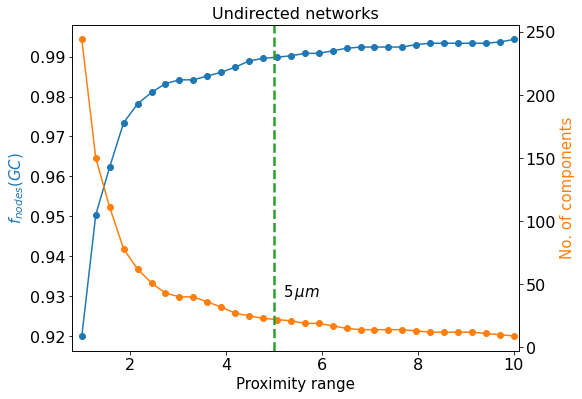

In [72]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(figsize=(8,6))
x = np.linspace(1,10,32)
y1 = np.array(n_nodesGC)/3163
y2 = n_components

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
ax1.plot(x, y1, '-o', color=blue,alpha=1)

ax2.plot(x, y2, '-o',color=orange, alpha=1)

ax1.set_xlabel('Proximity range', size=15)
ax1.set_ylabel(r'$f_{nodes}(GC)$', color=blue,size=15 )

ax2.set_ylabel('No. of components', color=orange,size=15)

plt.axvline(5, ls="--",c=green,  lw=2.5)

ax1.yaxis.set_tick_params(labelsize=16)
ax1.xaxis.set_tick_params(labelsize=16)

ax2.yaxis.set_tick_params(labelsize=16)

plt.title("Undirected networks", size=16)
ax1.text(5.2, 0.93, r"$5\, \mu m$", size=15)
plt.xlim([0.8,10.1])
#plt.xscale("log")
plt.savefig("proxRange_undirected.pdf", facecolor="white", bbox_inches="tight", dpi=600)
plt.show()

In [59]:
def get_graph_directed(adj_matfile, neuron_namesfile):
    # import the adjacency matrix from text file
    adjacency = np.load(adj_matfile)
    #print("Shape of adjacency matrix:", adjacency.shape)

    # import names of each neuron
    f = open(neuron_namesfile,"r") #opens file with name of "test.txt"
    neuron_names = []
    for line in f:
        neuron_names.append(line[:-1]) #[:-1] because we don't want /n in the end.  
    #print((neuron_names2))
    n_neurons = len(neuron_names)
    #print("Total number of neurons:",n_neurons)
    
    # create node and node attributes which is the name for the graph
    nodes_list = []
    for i in range(len(neuron_names)):
        #node attribute is given by its neuron name
        nodes_list.append((i,{"name":neuron_names[i]}))
    #print(len(nodes_list))

    # creating an edge list from adjacency matrix
    edge_list=[]
    for i in range(len(neuron_names)):
        for j in range(len(neuron_names)):
            if adjacency[i,j]==0: # if there's no weight, let's forget the edge.
                pass
            else:
                edge_list.append( (i,j,{"weight":adjacency[i,j],"Label":"%s - %s"%(neuron_names[i],neuron_names[j])}) )
    # Creating a directed graph from adjacency matrix so that it will be easy to deal using the networkx module

    G = nx.DiGraph()

    # Add all the nodes to the graph
    G.add_nodes_from(nodes_list)
    # Add all the edges to the graph
    G.add_edges_from(edge_list)
    
    #GC =  G.subgraph(max(nx.strongly_connected_components(G), key=len))

    return G#adjacency, neuron_names, n_neurons, G


In [60]:
fpath = "./adjmat_dir/"
#files2 = [f for f in sorted_alphanumeric(os.listdir(fpath)) if f.endswith('.npy') 
#         and os.path.isfile(os.path.join(fpath, f))]
#files
files = ["adjacency_synaptic_cleft_%.3f um.npy"%i for i in np.linspace(1,10,32)]


In [61]:
%%time
n_components = []
n_nodesGC = []

for i in range(len(files)):    
    
    #A_directed = np.load(fpath+files[i])
    G_dir_nx = get_graph_directed(fpath+files[i], "neuron_names.txt")

    
    GC_dir_nx =  G_dir_nx.subgraph(max(nx.weakly_connected_components(G_dir_nx), key=len))


    
    n_nodesGC.append(GC_dir_nx.number_of_nodes())
    n_components.append( len(list(nx.weakly_connected_components(G_dir_nx))) )
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
CPU times: user 6min 24s, sys: 1.37 s, total: 6min 26s
Wall time: 6min 37s


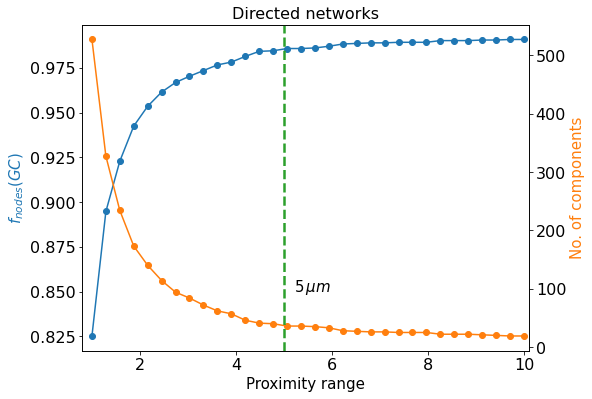

In [66]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(figsize=(8,6))
x = np.linspace(1,10,32)
y1 = np.array(n_nodesGC)/3163
y2 = n_components

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
ax1.plot(x, y1, '-o', color=blue,alpha=1)

ax2.plot(x, y2, '-o',color=orange, alpha=1)

ax1.set_xlabel('Proximity range', size=15)
ax1.set_ylabel(r'$f_{nodes}(GC)$', color=blue,size=15 )

ax2.set_ylabel('No. of components', color=orange,size=15)

plt.axvline(5, ls="--",c=green,  lw=2.5)

ax1.yaxis.set_tick_params(labelsize=16)
ax1.xaxis.set_tick_params(labelsize=16)

ax2.yaxis.set_tick_params(labelsize=16)

plt.title("Directed networks", size=16)
ax1.text(5.2, 0.85, r"$5\, \mu m$", size=15)
plt.xlim([0.8,10.1])
#plt.xscale("log")
plt.savefig("proxRange_directed.pdf", facecolor="white", bbox_inches="tight", dpi=600)
plt.show()

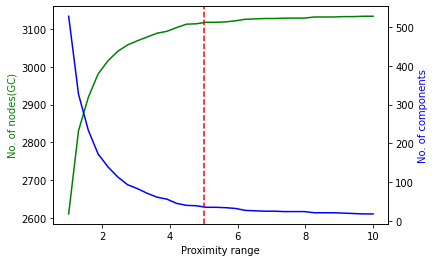

In [64]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1,10,32)
y1 = n_nodesGC
y2 = n_components

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, '-', c="g")
ax2.plot(x, y2, '-',c="b")

ax1.set_xlabel('Proximity range')
ax1.set_ylabel('No. of nodes(GC)', color='g')
ax2.set_ylabel('No. of components', color='b')

#plt.xscale("log")
plt.axvline(5, ls="--",c="red")

plt.show()